# Nonlinear Mapping

## Motivation: Can $(x + 1)^{2}$ be approximated throw a linear function?
Yes, but only if wew map the feature x into a new space: $\phi(x) = (a, b)$ with $a = x, b = x^{2}$

## Linear Regression with Basis Functions

$$
\Large \text{Nonlinear projection of features $\phi: \mathbb{R}^{D} -> \mathbb{R}^{M}$}
$$

Linear combinations of fixed __nonlinear functions__ of the input variables:

$$
\Large \text{$f(x_{i}, w) = w_{0} + \sum_{j=1}^{M} w_{j}\phi(x_{i})_{j}$}
$$

where $\phi(x_{i})_{j}$ are known as __basis functions__.

## Characteristics of this enhanced linear regression model:


$$
\Large \text{$f(x_{i}, w)$ is still a linear function of the weights $w_{i}$}
$$

$$
\Large \text{$f(x_{i}, w)$ is NOT a linear function of the input $x_{i}$}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set random seed
np.random.seed(42)

## Example 1

### Approximating $(x + 1)^{2}$ be approximated throw a linear function

In [3]:
# Create Noise
noise_train = np.random.normal(0, 0.8, 20)
noise_test = np.random.normal(0, 0.8, 10) 

# Creating data (training + testing)
X_train = np.linspace(-3, 3, 20)
y_train = X_train * X_train + noise_train

X_test = np.linspace(-3, 3, 10)
y_test = X_test * X_test + noise_test

# Create X_continues for poltting functions
X_continues = np.linspace(-3, 3, 100)

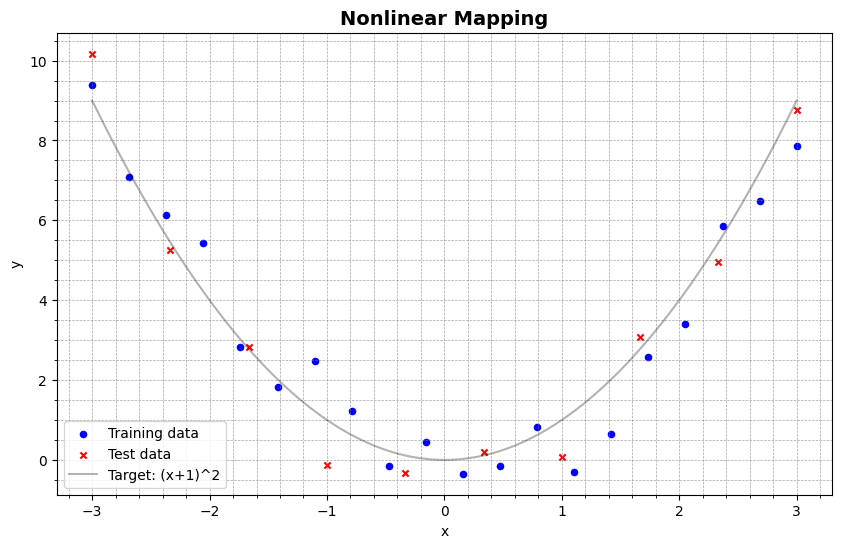

In [4]:
plt.figure(figsize=(10, 6))
plt.title('Nonlinear Mapping', fontsize=14, fontweight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.minorticks_on()
plt.scatter(X_train, y_train, color='blue', s=20, marker='o', label='Training data')
plt.scatter(X_test, y_test, color='red', s=20, marker='x', label='Test data')
plt.plot(X_continues, X_continues * X_continues, color='black', label='Target: (x+1)^2', alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [5]:
# Helper functions

# Mapping function: x -> (x, x^2)
def phi(X: np.ndarray) -> np.ndarray:
    return np.array([[x, x**2] for x in X])

# Adding bias
def add_bias(X: np.ndarray) -> np.ndarray:
    return np.array([np.append(1, x) for x in X])

# For plotting the model function
def f_model(X: np.ndarray, w: np.ndarray) -> np.ndarray:
    X_map = phi(X)
    X_b = add_bias(X_map)
    return np.dot(X_b, w)

In [6]:
def gradient_descent(X: np.ndarray, y: np.ndarray, eps: float, max_iter: int, verbose: bool=False) -> np.ndarray:
    w = np.zeros(3)                             # (3,)
    X_map = phi(X)                              # (N x 2)
    X_b = add_bias(X_map)                       # (N x 3)
    for iter in range(max_iter):
        y_hat = np.dot(X_b, w)                  # (N,)
        J_w = -2 * np.dot((y - y_hat), X_b)     # (3,)
        w = w - eps * J_w                       # (3,)
        
        # Printing loss
        if verbose and iter % 10 == 0:
            y_hat = f_model(X, w)
            loss = np.mean((y - y_hat)**2) 
            print(f"Iter: {iter}, Loss: {loss}")
    return w

In [7]:
w_star = gradient_descent(X_train, y_train, eps=0.0001, max_iter=100, verbose=True)

Iter: 0, Loss: 16.241636886510456
Iter: 10, Loss: 3.412014279656572
Iter: 20, Loss: 1.0235094210242643
Iter: 30, Loss: 0.5620431110810737
Iter: 40, Loss: 0.46006829099135294
Iter: 50, Loss: 0.4280852205632552
Iter: 60, Loss: 0.41194344173626024
Iter: 70, Loss: 0.4009919735106545
Iter: 80, Loss: 0.39274255244945977
Iter: 90, Loss: 0.38633217444346785


In [8]:
# Print weights
print(w_star)

[ 0.12234324 -0.18586675  0.94887405]


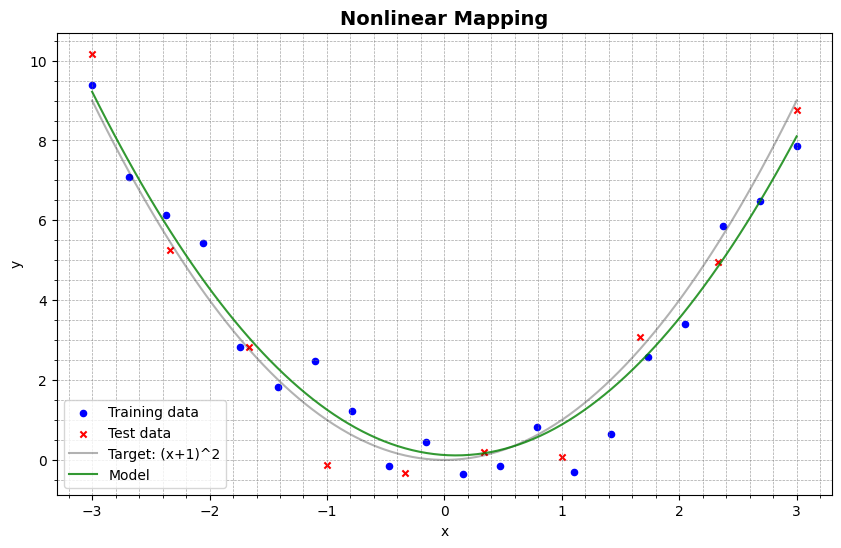

In [9]:
plt.figure(figsize=(10, 6))
plt.title('Nonlinear Mapping', fontsize=14, fontweight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.minorticks_on()
plt.scatter(X_train, y_train, color='blue', s=20, marker='o', label='Training data')
plt.scatter(X_test, y_test, color='red', s=20, marker='x', label='Test data')
plt.plot(X_continues, X_continues * X_continues, color='black', label='Target: (x+1)^2', alpha=0.3)
plt.plot(X_continues, f_model(X_continues, w_star), color='green', label='Model', alpha=0.8)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [10]:
# Calculating MSE over testing set
y_pred = f_model(X_test, w_star)
mse = np.mean((y_test-y_pred)**2)
print(f'Mean Squarred Error (MSE) = {mse}')

Mean Squarred Error (MSE) = 0.5000012326069212


## Example 2:

### Approximating $\frac{1}{2}e^{x} + 20 $ throw a linear function


In [11]:
# Creating some noise
SAMPLES_train = 40
SAMPLES_test = 20
noise_train = np.random.normal(0, 1.5, SAMPLES_train)
noise_test = np.random.normal(0, 1.5, SAMPLES_test)

X_train = np.linspace(-1, 4, SAMPLES_train)
y_train = (0.5 * np.exp(X_train) + 20) + noise_train

X_test = np.linspace(-1, 4, SAMPLES_test)
y_test = 0.5 * np.exp(X_test) + 20 + noise_test

X_continues = np.linspace(-1, 4, 100)

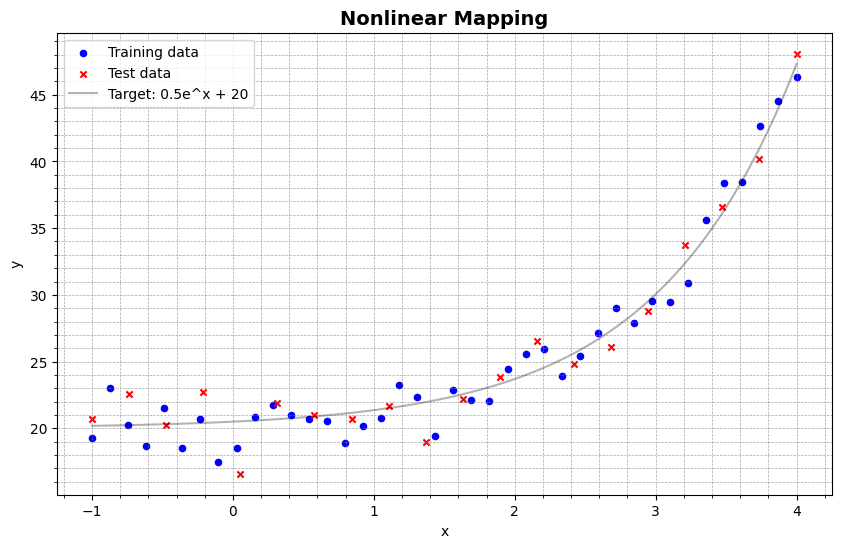

In [12]:
plt.figure(figsize=(10, 6))
plt.title('Nonlinear Mapping', fontsize=14, fontweight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.minorticks_on()
plt.scatter(X_train, y_train, color='blue', s=20, marker='o', label='Training data')
plt.scatter(X_test, y_test, color='red', s=20, marker='x', label='Test data')
plt.plot(X_continues, 0.5 * np.exp(X_continues) + 20, color='black', label='Target: 0.5e^x + 20', alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [13]:
# Helper functions

# Mapping function: x -> (x, x^2)
def phi(X: np.ndarray) -> np.ndarray:
    return np.exp(X)

# Adding bias
def add_bias(X: np.ndarray) -> np.ndarray:
    return np.array([np.append(1, x) for x in X])

# For plotting the model function
def f_model(X: np.ndarray, w: np.ndarray) -> np.ndarray:
    X_map = phi(X)
    X_b = add_bias(X_map)
    return np.dot(X_b, w)

In [14]:
def gradient_descent(X: np.ndarray, y: np.ndarray, eps: float, max_iter: int, verbose: bool=False) -> np.ndarray:
    w = np.zeros(2)                             # (2,)
    X_map = phi(X)                              # (N x 2)
    X_b = add_bias(X_map)                       # (N x 2)
    for iter in range(max_iter):
        y_hat = np.dot(X_b, w)                  # (N,)
        J_w = -2 * np.dot((y - y_hat), X_b)     # (2,)
        w = w - eps * J_w                       # (2,)
        
        # Printing loss
        if verbose and iter % 1000 == 0:
            y_hat = f_model(X, w)
            loss = np.mean((y - y_hat)**2) 
            print(f"Iter: {iter}, Loss: {loss}")
    return w

In [15]:
w_star = gradient_descent(X_train, y_train, eps=0.00001, max_iter=10000, verbose=True)

Iter: 0, Loss: 491.4668013609221
Iter: 1000, Loss: 90.5890919514272
Iter: 2000, Loss: 35.05170403861342
Iter: 3000, Loss: 14.241195361946358
Iter: 4000, Loss: 6.443254413381941
Iter: 5000, Loss: 3.521274754831997
Iter: 6000, Loss: 2.4263748086414823
Iter: 7000, Loss: 2.0161029956053875
Iter: 8000, Loss: 1.8623693497525722
Iter: 9000, Loss: 1.8047635549690924


In [16]:
# Print weights
print(w_star)

[19.55212977  0.51923052]


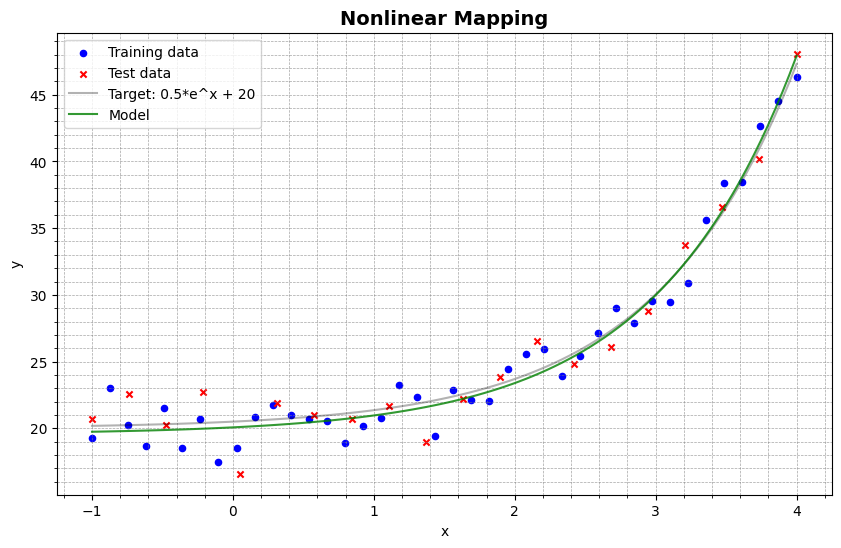

In [17]:
plt.figure(figsize=(10, 6))
plt.title('Nonlinear Mapping', fontsize=14, fontweight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.minorticks_on()
plt.scatter(X_train, y_train, color='blue', s=20, marker='o', label='Training data')
plt.scatter(X_test, y_test, color='red', s=20, marker='x', label='Test data')
plt.plot(X_continues, 0.5 * np.exp(X_continues) + 20, color='black', label='Target: 0.5*e^x + 20', alpha=0.3)
plt.plot(X_continues, f_model(X_continues, w_star), color='green', label='Model', alpha=0.8)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [18]:
# Calculating MSE over testing set
y_pred = f_model(X_test, w_star)
mse = np.mean((y_test-y_pred)**2)
print(f'Mean Squarred Error (MSE) = {mse}')

Mean Squarred Error (MSE) = 2.5423454174493
